## Data Description

* **Price:** Price of diamond in US Dollar
* **Carat:** Weight of diamond
* **Cut:** Quality of cut (Fair, Good, Very Good, Premium, Ideal)
* **Color:** Diamond color (from J -->"Worst" to D --> "Best")
* **Clarity:** Measurement of transparency 
* **Depth:** Total depth percentage
* **Table:** Width of top of a diamond
* **x:** Length of diamond in mm
* **y:** Width of diamond in mm
* **z:** Depth of diamond in mm

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
DiamondPriceData=pd.read_csv('C:\\Users\\User\\Desktop\\Ivy Professional School\\Python\\DiamondPricesData.csv', encoding='latin')
print('Shape before deleting duplicate values:', DiamondPriceData.shape)

# Removing duplicate rows if any
DiamondPriceData=DiamondPriceData.drop_duplicates()
print('Shape After deleting duplicate values:', DiamondPriceData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
DiamondPriceData.head(10)

Shape before deleting duplicate values: (53940, 10)
Shape After deleting duplicate values: (53794, 10)


,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
5,336,0.24,Very Good,J,VVS2,NaN,57.0,3.94,3.96,2.48
6,336,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47
7,337,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
8,337,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49
9,338,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39


## Defining the Problem Statement

* **Target Variable:** Price
* **Predictors:** Carat, Cut, Color, Clarity, Depth, Table, x, y, z

## Determining the type to machine Learning

Based on the problem statement we can understand that we need to create a supervised ML Regression model, as the target variable is Continuous.

## Looking at the distribution of Target Variable

<Axes: >

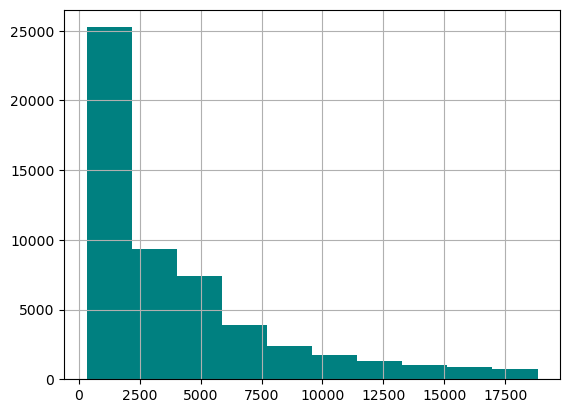

In [3]:
%matplotlib inline
# Plotting the target variable
DiamondPriceData['price'].hist(color='teal')

The data distribution of the target variable is unsatisfactory because the distribution is too skewed ie; positively skewed and hence we cannot proceed with predictive modeling. Therefore, we need to perform necessary step to make the curve bell shaped.

In [4]:
# Taking log transformation of the price column
DiamondPriceData['log_Price'] = np.log(DiamondPriceData['price'])
DiamondPriceData.head(2)

,price,carat,cut,color,clarity,depth,table,x,y,z,log_Price
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,5.786897
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,5.786897


<Axes: >

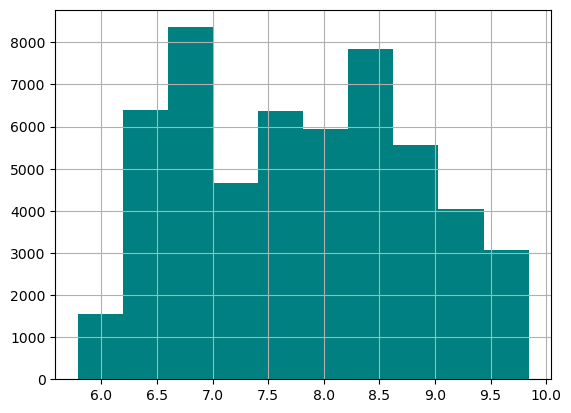

In [6]:
# Plotting the target variable after taking log transformation
DiamondPriceData['log_Price'].hist(color='teal')

After taking log transformation of the target variable the distribution of the variable is satisfactory and can be used for predictive modeling.

## Basic Data Exploration

In [7]:
# Looking at sample rows in the data
DiamondPriceData.head()

,price,carat,cut,color,clarity,depth,table,x,y,z,log_Price
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,5.786897
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,5.786897
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,5.789960
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,5.811141
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,5.814131


In [8]:
# Observing the summarized information of the data
DiamondPriceData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      53794 non-null  int64  
 1   carat      53794 non-null  float64
 2   cut        53794 non-null  object 
 3   color      53788 non-null  object 
 4   clarity    53794 non-null  object 
 5   depth      53780 non-null  float64
 6   table      53794 non-null  float64
 7   x          53794 non-null  float64
 8   y          53794 non-null  float64
 9   z          53794 non-null  float64
 10  log_Price  53794 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.9+ MB


In [9]:
# Looking at the descriptive statistics of the data
DiamondPriceData.describe(include='all')

,price,carat,cut,color,clarity,depth,table,x,y,z,log_Price
count,53794.000000,53794.00000,53794,53788,53794,53780.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21488,11256,13032,NaN,NaN,NaN,NaN,NaN,NaN
mean,3933.065082,0.79778,NaN,NaN,NaN,61.748154,57.458109,5.731214,5.734653,3.538714,7.787138
std,3988.114460,0.47339,NaN,NaN,NaN,1.429948,2.233679,1.120695,1.141209,0.705037,1.014439
min,326.000000,0.20000,NaN,NaN,NaN,43.000000,43.000000,0.000000,0.000000,0.000000,5.786897
25%,951.000000,0.40000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.720000,2.910000,6.857514
50%,2401.000000,0.70000,NaN,NaN,NaN,61.800000,57.000000,5.700000,5.710000,3.530000,7.783641
75%,5326.750000,1.04000,NaN,NaN,NaN,62.500000,59.000000,6.540000,6.540000,4.030000,8.580497


In [10]:
# Finding unique values for each column
DiamondPriceData.nunique()

price        11602
carat          273
cut              5
color            7
clarity          8
depth          184
table          127
x              554
y              552
z              375
log_Price    11602
dtype: int64

## Basic Data Exploration Results

* **Price:** Continuous
* **Carat:** Continuous. Selected
* **Cut:** Categorical.Selected
* **Color:** Categorical. Selected
* **Clarity:** Categorical. Selected
* **Depth:** Continuous. Selected
* **Table:** Continuous. Selected
* **x:** Continuous. Selected
* **y:** Continuous. Selected
* **z:** Continuous. Selected
* **log_Price:** Continuous. Selected. **Target Variable**

## Visual Exploratory Data Analysis

* **Categorical Variables:** Bar plot
* **Continuous Variable:** Histogram

## Visualize distribution of all the Categorical Predictor variables in the data using bar plots

We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted three categorical predictors in the data

Categorical Predictors:

'cut', 'color', 'clarity'

We use bar charts to see how the data is distributed for these categorical columns.

In [11]:
# Plotting multiple bar charts at once for categorical variables

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber],color= 'teal')

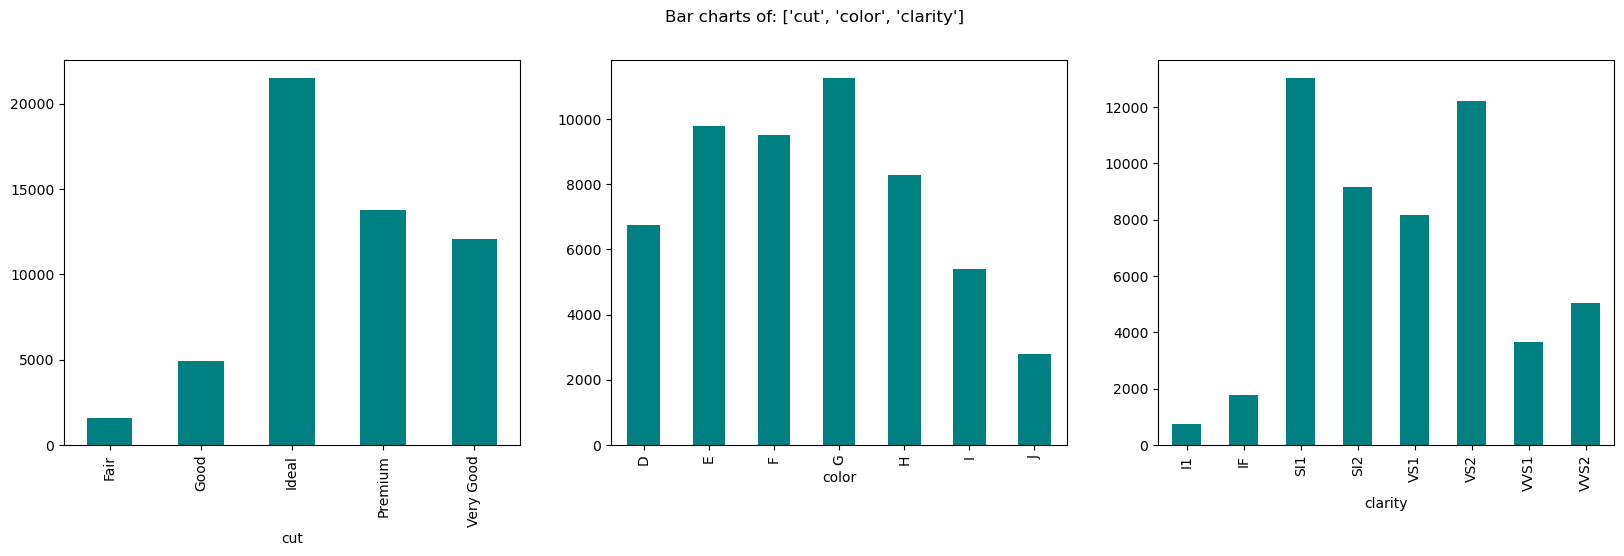

In [12]:
# Calling the function
PlotBarCharts(inpData=DiamondPriceData, colsToPlot=['cut','color','clarity'])

## Bar Chat Interpretation

These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

**Selected Categorical Variables: All the categorical variables are selected for further analysis.**

'cut', 'color', 'clarity'

## Visual distribution of all the Continuous Variables in the data using histogram

Based on the Basic Data Exploration, Three continuous predictor variables 'log_Price',carat', 'depth', 'table', 'x', 'y', 'z'.

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>]],
      dtype=object)

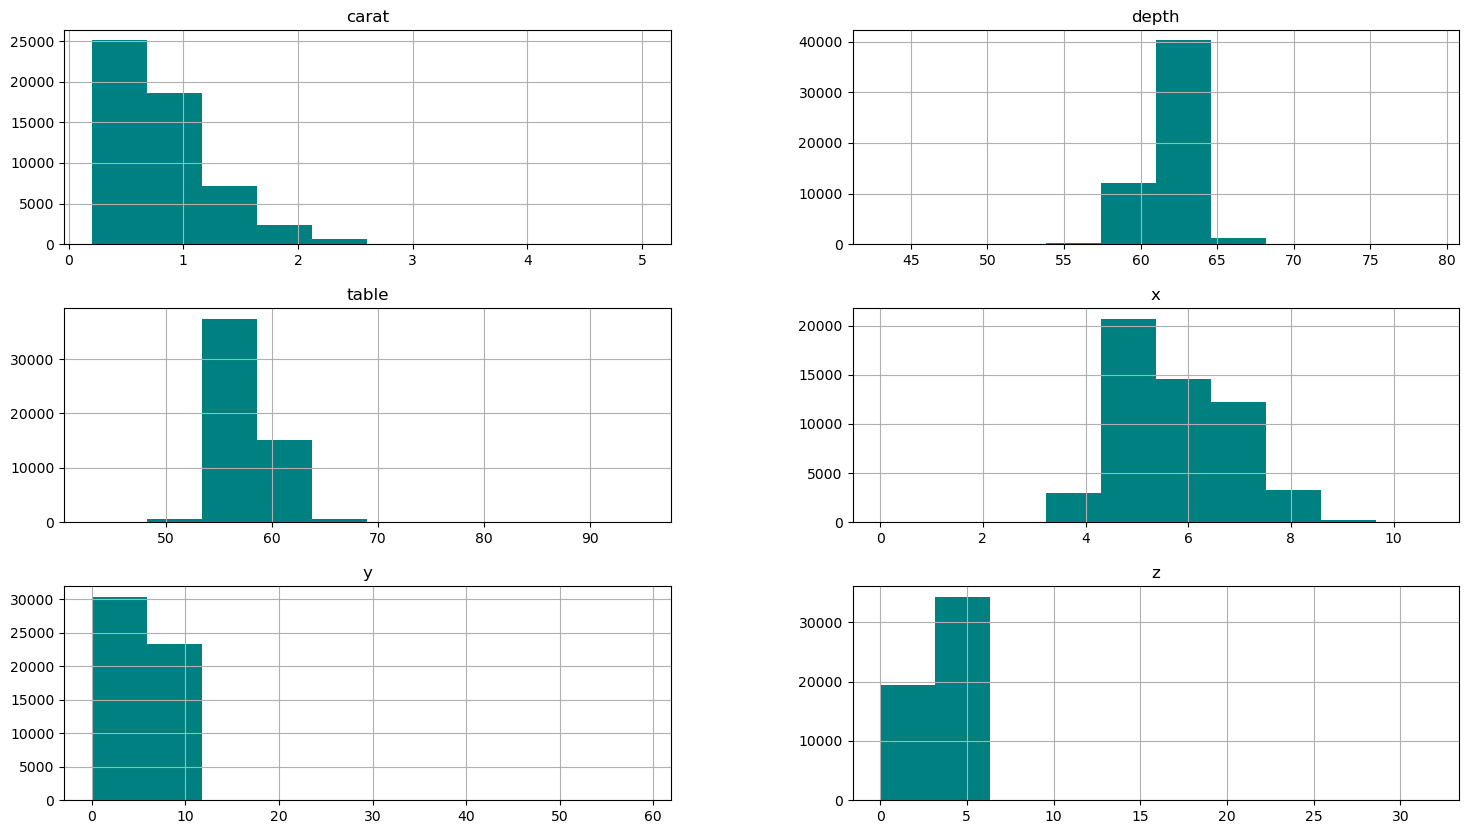

In [13]:
# Plotting histograms of multiple columns together
DiamondPriceData.hist(['carat', 'depth','table', 'x', 'y','z'], figsize=(18,10), color='teal')

## Histogram Interpretation

Histograms shows us the data distribution for a single continuous variable.
The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "carat", there are around 25000 rows in data that has a value between 0 to 1.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

**Selected Continuous Variables:**

* **carat:** Selected
* **depth:** Selected
* **table:** Selected
* **x:** Selected
* **y:** Selected
* **z:** Selected

## Outlier Treatment

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

* **Option-1:** Delete the outlier Records. Only if there are just few rows lost.
* **Option-2:** Impute the outlier values with a logical business value


Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

### Treating outliers for the x column

In [14]:
# Finding logical value near 2
DiamondPriceData['x'][DiamondPriceData['x']>2].sort_values(ascending=True)

31596     3.73
31600     3.73
31598     3.74
31599     3.76
31601     3.77
         ...  
26444    10.01
25999    10.02
25998    10.14
27630    10.23
27415    10.74
Name: x, Length: 53787, dtype: float64

Based on the above output, the nearest logical value is 3.73, hence, replacing any value greater than 2 with it.

In [15]:
# Replacing outliers with nearest logical value
DiamondPriceData['x'][DiamondPriceData['x']<3.73]=3.73

### Treating outlier for the y column

In [16]:
# Finding the nearest value
DiamondPriceData['y'][DiamondPriceData['y']<20].sort_values(ascending= False)

27415    10.54
27630    10.16
25998    10.10
26444     9.94
25999     9.94
         ...  
26243     0.00
11963     0.00
24520     0.00
15951     0.00
49556     0.00
Name: y, Length: 53792, dtype: float64

Based on the above output, the nearest logical value is 10.54, hence, replacing any value greater than 20 with it.

In [17]:
# Replacing outliers with nearest logical value
DiamondPriceData['y'][DiamondPriceData['y']>20]=10.54

### Treating the outlier for the z column

In [18]:
# Finding the nearest value
DiamondPriceData['z'][DiamondPriceData['z']<10].sort_values(ascending= False)

24067    8.06
27415    6.98
27630    6.72
27130    6.43
23644    6.38
         ... 
49556    0.00
4791     0.00
26123    0.00
5471     0.00
13601    0.00
Name: z, Length: 53793, dtype: float64

Based on the above output, the nearest logical value is 6.98, hence, replacing any value greater than 8 with it.

In [19]:
# Replacing outliers with nearest logical value
DiamondPriceData['z'][DiamondPriceData['z']>8]=6.98

## Visualizing the distribution again after the outlier treatment

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >]], dtype=object)

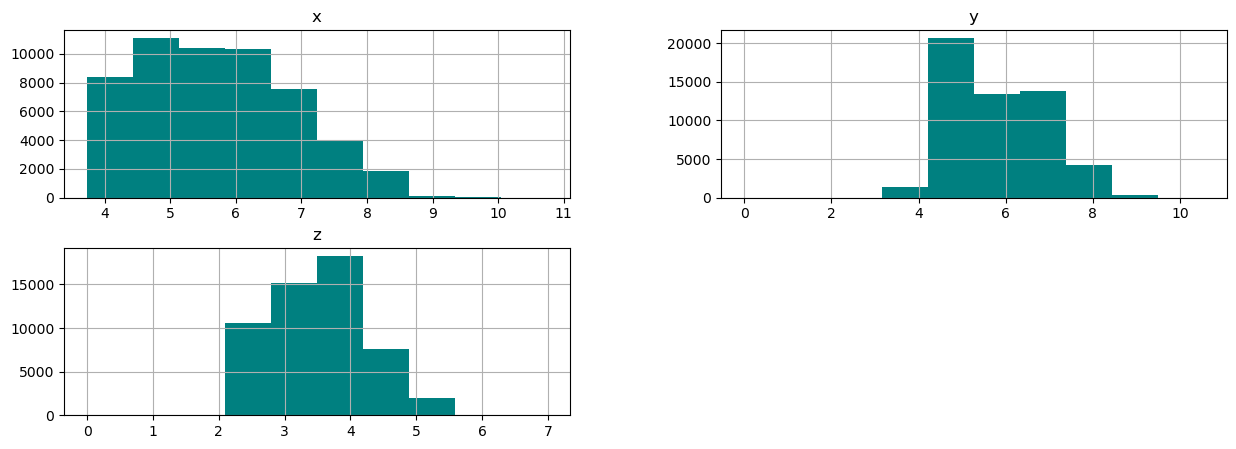

In [20]:
# Histogram for x, y, z after the outlier treatment
DiamondPriceData[['x', 'y','z']].hist(figsize=(15,5),color="teal")

The distribution has improved after the outlier treatment. Hence it is accepted.

## Missing Value Treatment

In [21]:
# Checking for missing values
DiamondPriceData.isnull().sum()

price         0
carat         0
cut           0
color         6
clarity       0
depth        14
table         0
x             0
y             0
z             0
log_Price     0
dtype: int64

**I am treating missing values with Median for Continuous values, and Mode for categorical values.**

In [22]:
# Finding the mode value for color
DiamondPriceData['color'].mode()

0    G
Name: color, dtype: object

In [23]:
DiamondPriceData['color'].fillna(value=DiamondPriceData['color'].mode()[0], inplace=True)

In [24]:
# Finding the median value for depth
DiamondPriceData['depth'].median()

61.8

In [25]:
# Replacing the missing value for depth with median value
DiamondPriceData['depth'].fillna(value=DiamondPriceData['depth'].median(), inplace=True)

In [26]:
# Checking the missing values after the tratment
DiamondPriceData.isnull().sum()

price        0
carat        0
cut          0
color        0
clarity      0
depth        0
table        0
x            0
y            0
z            0
log_Price    0
dtype: int64

## Feature Selection (Bi-Variate Analysis)

Now we will finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

### Relationship Exploration : Continuous vs Continuous  ----- Scatter Plot

When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

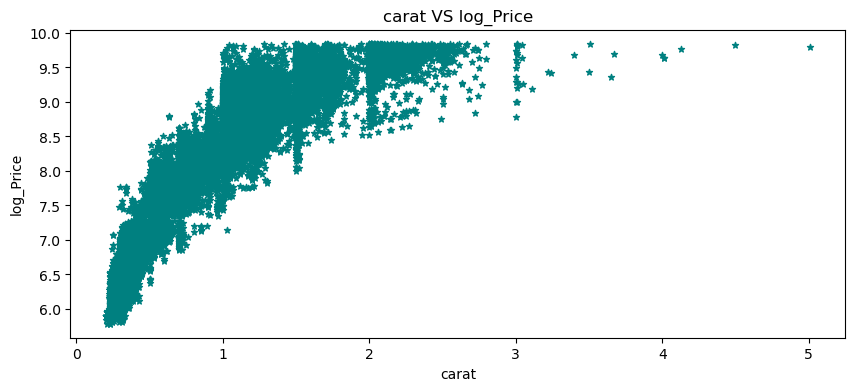

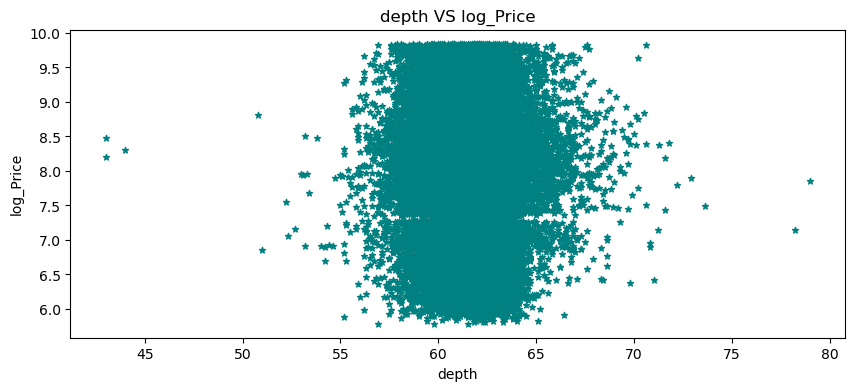

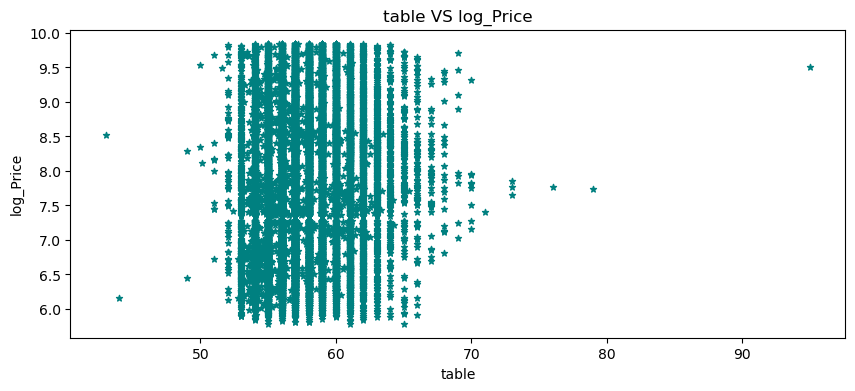

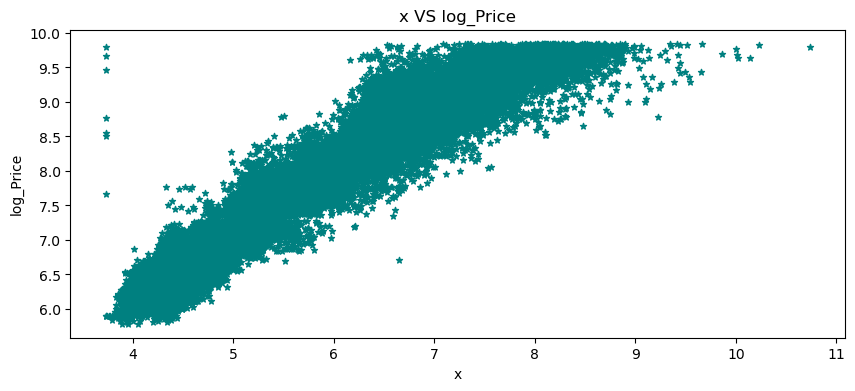

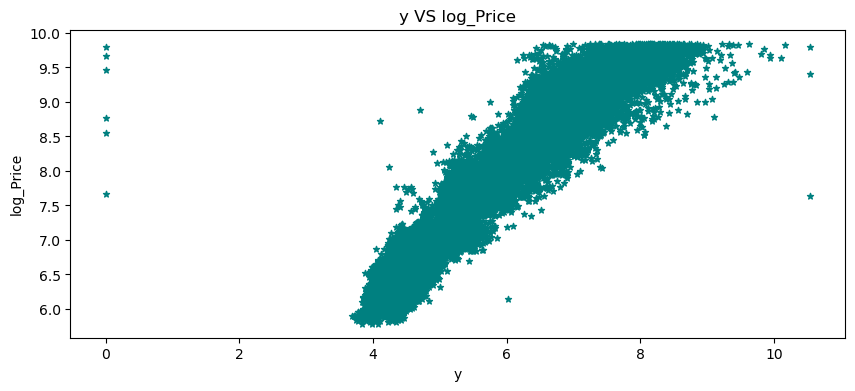

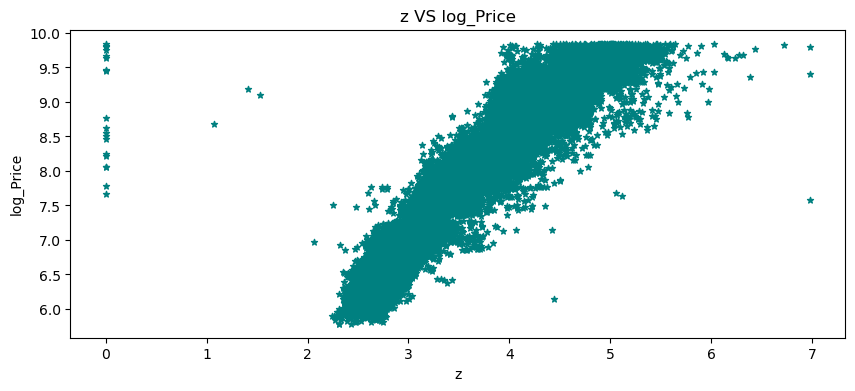

In [27]:
ContinuousCols=['carat','depth','table', 'x', 'y','z']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    DiamondPriceData.plot.scatter(x=predictor, y='log_Price', figsize=(10,4), title=predictor+" VS "+ 'log_Price',
                                  marker ='*',color = 'teal')

## Statistical Feature Selection (Continuous vs Continuous) using Correlation Value

* This value can be calculated only between two numeric columns
* Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question

In [28]:
# Calculating correlation matrix
ContinuousCols=['log_Price','carat','depth','table', 'x', 'y','z']

# Creating the correlation matrix
CorrelationData=DiamondPriceData[ContinuousCols].corr()
CorrelationData

,log_Price,carat,depth,table,x,y,z
log_Price,1.000000,0.920370,0.000816,0.157513,0.960171,0.959080,0.949715
carat,0.920370,1.000000,0.027879,0.181091,0.977278,0.974486,0.968380
depth,0.000816,0.027879,1.000000,-0.297556,-0.025284,-0.028502,0.096266
table,0.157513,0.181091,-0.297556,1.000000,0.195307,0.188487,0.153383
x,0.960171,0.977278,-0.025284,0.195307,1.000000,0.997699,0.985023
y,0.959080,0.974486,-0.028502,0.188487,0.997699,1.000000,0.985264
z,0.949715,0.968380,0.096266,0.153383,0.985023,0.985264,1.000000


In [30]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
CorrelationData['log_Price'][abs(CorrelationData['log_Price']) > 0.5]

log_Price    1.000000
carat        0.920370
x            0.960171
y            0.959080
z            0.949715
Name: log_Price, dtype: float64

**Fianl Selected Columns:**

'carat',  'x',  'y',  'z'

## Relationship Exploration: Categorical vs Continuous ------ Box plots

When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

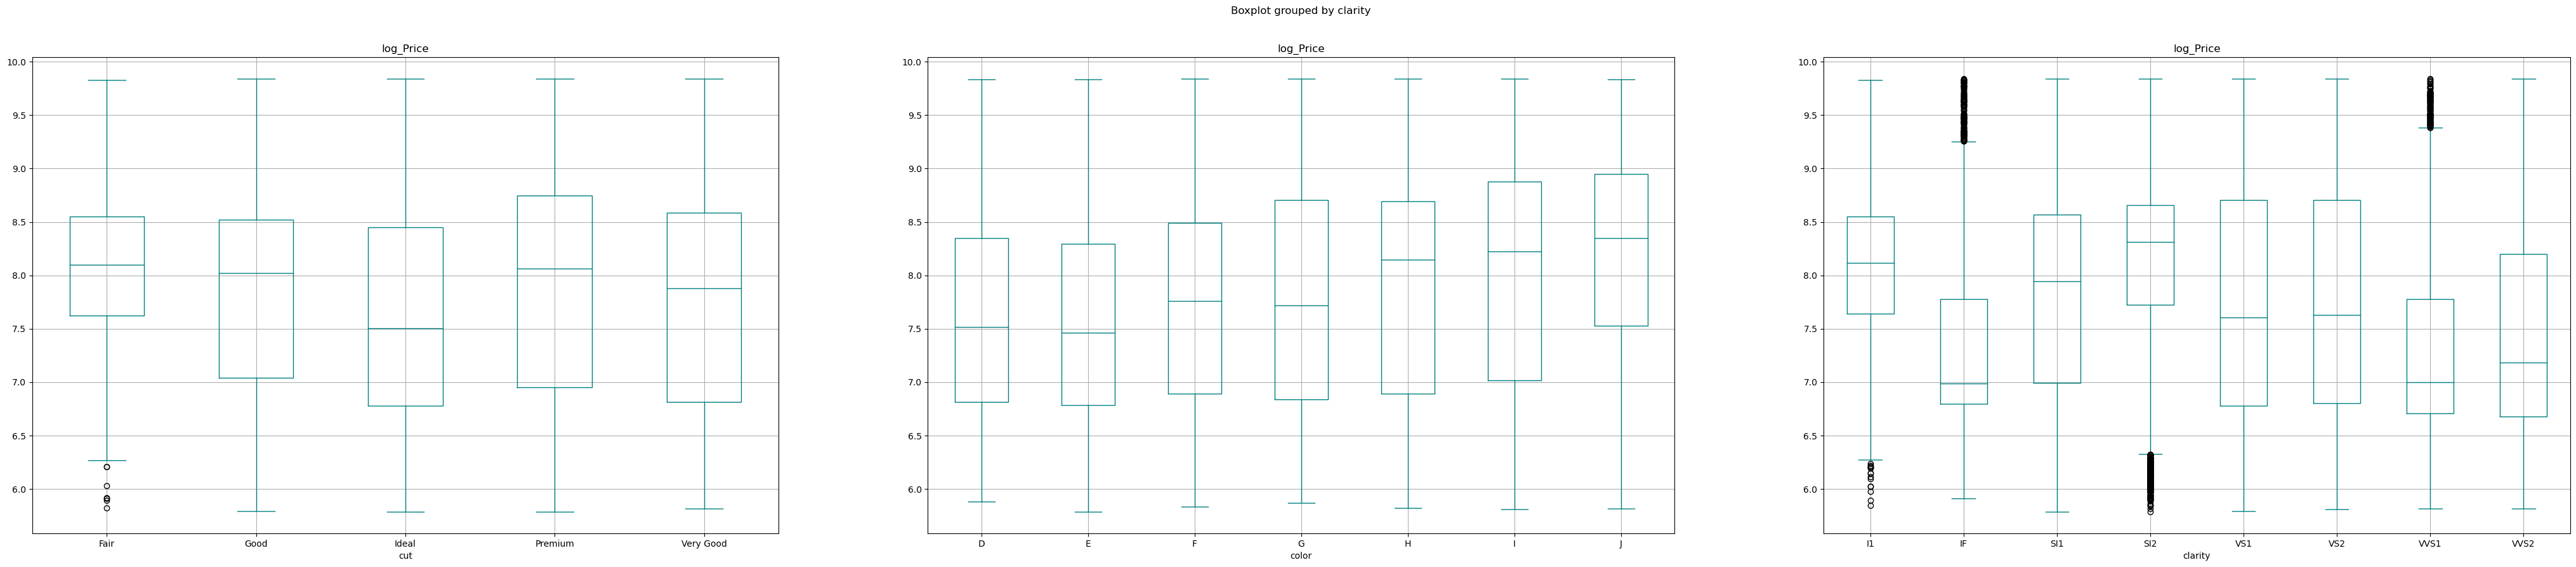

In [31]:
# Box plots for Categorical Target Variable "Price" and continuous predictors
CategoricalColsList=['cut','color','clarity']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(50,10))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    DiamondPriceData.boxplot(column='log_Price', by=PredictorCol, figsize=(15,15), vert=True,
                             ax=PlotCanvas[i], color = "teal")

## Box Plots Interpretation

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Price.

We confirm this by looking at the results of ANOVA test.

### Statistical Feature Selection (Categorical vs Continuous) using ANOVA Test

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* **Assumption(H0):** There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* **ANOVA Test result:** Probability of H0 being true

In [32]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            # Accepting the H0 if the P value is more than 0.05
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [33]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['cut','color','clarity']
FunctionAnova(inpData=DiamondPriceData, 
              TargetVariable='log_Price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

cut is correlated with log_Price | P-Value: 1.1832426151972313e-208
color is correlated with log_Price | P-Value: 1.8695142124283026e-298
clarity is correlated with log_Price | P-Value: 0.0


['cut', 'color', 'clarity']

The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable.

**Final selected Categorical columns:**

'cut', 'color', 'clarity'

## Selecting the Final Predictors for Machine Learning

Based on the above tests, selecting the final columns for machine learning

In [34]:
SelectedColumns=['carat','cut', 'color', 'clarity', 'x', 'y', 'z']

# Selecting final columns
DataForML=DiamondPriceData[SelectedColumns]
DataForML.head()

,carat,cut,color,clarity,x,y,z
0,0.23,Ideal,E,SI2,3.95,3.98,2.43
1,0.21,Premium,E,SI1,3.89,3.84,2.31
2,0.23,Good,E,VS1,4.05,4.07,2.31
3,0.29,Premium,I,VS2,4.20,4.23,2.63
4,0.31,Good,J,SI2,4.34,4.35,2.75


## Converting the Binary Nominal Variable to Numeric using Mapping

In [35]:
DataForML["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [36]:
# Converting the binary nominal variable cut to numeric
DataForML['cut'].replace({'Good':1, 'Very Good':2, 'Fair':3, 'Ideal':4, 'Premium':5}, inplace=True)

In [37]:
DataForML["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [38]:
# Converting the binary nominal variable color to numeric
DataForML['color'].replace({'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}, inplace=True)

In [39]:
DataForML["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [40]:
# Converting the binary nominal variable clarity to numericVVS2
DataForML['clarity'].replace({'I1':1, 'SI1':2, 'SI2':3, 'VS1':4, 'VS2':5, 'VVS1':6, 'VVS2':7, 'IF':8}, inplace=True)

In [41]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [42]:
import pandas as pd
DataForML=pd.read_pickle('DataForML.pkl')
DataForML.head()

,carat,cut,color,clarity,x,y,z
0,0.23,4,6,3,3.95,3.98,2.43
1,0.21,5,6,2,3.89,3.84,2.31
2,0.23,1,6,4,4.05,4.07,2.31
3,0.29,5,2,5,4.20,4.23,2.63
4,0.31,1,1,3,4.34,4.35,2.75


## Converting the Nominal Variable to Numeric using get_dummies()

In [43]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['log_Price']=DiamondPriceData['log_Price']

# Printing sample rows
DataForML_Numeric.head()

,carat,cut,color,clarity,x,y,z,log_Price
0,0.23,4,6,3,3.95,3.98,2.43,5.786897
1,0.21,5,6,2,3.89,3.84,2.31,5.786897
2,0.23,1,6,4,4.05,4.07,2.31,5.789960
3,0.29,5,2,5,4.20,4.23,2.63,5.811141
4,0.31,1,1,3,4.34,4.35,2.75,5.814131


## Machine Learning: Splitting the data into Training and Testing Sample

We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [44]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z', 'log_Price'], dtype='object')

In [45]:
# Separate Target Variable and Predictor Variables
TargetVariable='log_Price'
Predictors=['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=31)

# Quick check on the shapes of train and test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37655, 7)
(37655,)
(16139, 7)
(16139,)


# Multiple Linear Regression

In [47]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)

# Taking the standardized values to original scale

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
prediction=LREG.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)


# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['log_Price']-TestingDataResults['Predictedlog_Price']))/TestingDataResults['log_Price'])

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable, 'APE']].head())


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=5, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9630278413433501

##### Model Validation and Accuracy Calculations ##########
   log_Price  Predictedlog_Price        APE
0   6.920672                 7.0   1.146254
1   6.063785                 6.0   1.051904
2   7.984122                 8.0   0.198870
3   7.798113                 7.0  10.234690
4   8.843038                 9.0   1.774981
Mean Accuracy on test data: 96.02684124643653
Median Accuracy on test data: 96.36211561246633

Accuracy values for 10-fold Cross Validation:
 [98.1156039  97.93361998 97.92795244 97.97996763 98.36932819]

Final Average Accuracy of the model: 98.07


# Decision Trees

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9613028997998142

##### Model Validation and Accuracy Calculations ##########
   log_Price  Predictedlog_Price
0   6.920672                 7.0
1   6.063785                 6.0
2   7.984122                 8.0
3   7.798113                 8.0
4   8.843038                 8.0
Mean Accuracy on test data: 95.81192424616918
Median Accuracy on test data: 96.24516541766933

Accuracy values for 10-fold Cross Validation:
 [96.55036745 97.20627198 97.2291577  96.06035232 96.93661614 97.22400178
 96.83799896 96.3726541  97.16004254 96.70899868]

Final Average Accuracy of the model: 96.83


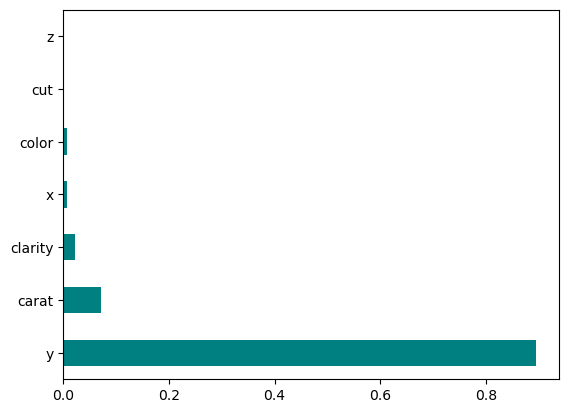

In [48]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5, criterion='friedman_mse')
# Good Range of hyper parameter Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh', color='teal')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
prediction=DT.predict(X_test)
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['log_Price']-TestingDataResults['Predictedlog_Price']))/TestingDataResults['log_Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="y <= 5.605\nfriedman_mse = 1.033\nsamples = 37655\nvalue = 7.786"] ;
1 [label="carat <= 0.455\nfriedman_mse = 0.222\nsamples = 17794\nvalue = 6.871"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="x <= 4.625\nfriedman_mse = 0.087\nsamples = 12089\nvalue = 6.616"] ;
1 -> 2 ;
3 [label="clarity <= 5.5\nfriedman_mse = 0.071\nsamples = 8370\nvalue = 6.515"] ;
2 -> 3 ;
4 [label="color <= 3.5\nfriedman_mse = 0.059\nsamples = 5231\nvalue = 6.434"] ;
3 -> 4 ;
5 [label="friedman_mse = 0.032\nsamples = 1263\nvalue = 6.257"] ;
4 -> 5 ;
6 [label="friedman_mse = 0.055\nsamples = 3968\nvalue = 6.491"] ;
4 -> 6 ;
7 [label="carat <= 0.295\nfriedman_mse = 0.06\nsamples = 3139\nvalue = 6.651"] ;
3 -> 7 ;
8 [label="friedman_mse = 0.028\nsamples = 714\nvalue = 6.356"] ;
7 -> 8 ;
9 [label="friedman_mse = 0.036\nsamples = 2425\nvalue = 6.737"] ;
7 -> 9 ;
10 [label="clarity <= 5.5\nfriedm

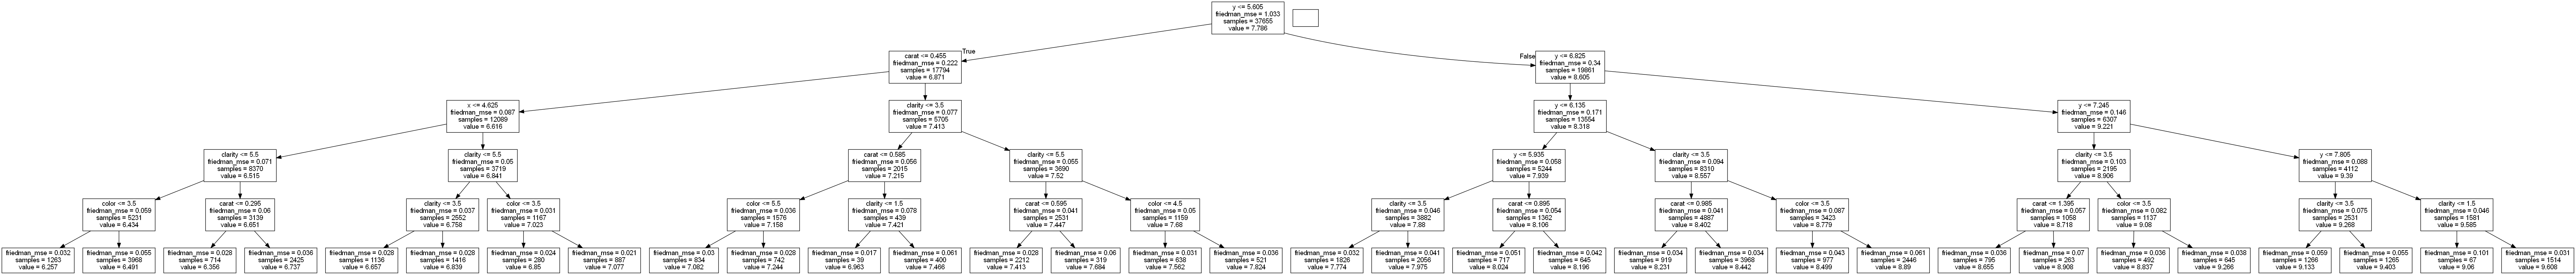

In [49]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None, 
                                feature_names=Predictors)
# printing the rules
print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=8000,height=8000)